In [1]:
import numpy as np
import math

In [2]:
d = {
    "Amsterdam": 0,
    "Brussels": 1,
    "Bordeaux": 2,
    "Franckfort": 3,
    "Gravelines": 4,
    "London": 5,
    "Lyon": 6,
    "Madrid": 7,
    "Marseille": 8,
    "Milano": 9,
    "Paris": 10,
    "Prague": 11,
    "Roubaix": 12,
    "Strasbourg": 13,
    "Warszawa": 14,
    "Wien": 15,
    "Zurich": 16
}

dis = np.array([
    [0, 1, 4, 2, 2, 1, 4, 5, 4, 3, 3, 2, 2, 3, 1, 2, 3],
    [1, 0, 3, 1, 2, 2, 3, 4, 4, 3, 2, 2, 1, 2, 2, 3, 2],
    [4, 3, 0, 3, 3, 4, 2, 1, 1, 2, 1, 4, 2, 2, 4, 3, 3],
    [2, 1, 3, 0, 3, 3, 3, 4, 3, 2, 2, 1, 2, 1, 2, 2, 1],
    [2, 2, 3, 3, 0, 1, 3, 4, 4, 5, 2, 4, 1, 3, 3, 4, 4],
    [1, 2, 4, 3, 1, 0, 4, 5, 5, 4, 3, 3, 2, 4, 2, 3, 4],
    [4, 3, 2, 3, 3, 4, 0, 2, 1, 2, 1, 4, 2, 2, 4, 3, 3],
    [5, 4, 1, 4, 4, 5, 2, 0, 1, 2, 2, 4, 3, 3, 4, 3, 3],
    [4, 4, 1, 3, 4, 5, 1, 1, 0, 1, 2, 3, 3, 3, 3, 2, 2],
    [3, 3, 2, 2, 5, 4, 2, 2, 1, 0, 3, 2, 4, 3, 2, 1, 1],
    [3, 2, 1, 2, 2, 3, 1, 2, 2, 3, 0, 3, 1, 1, 4, 4, 3],
    [2, 2, 4, 1, 4, 3, 4, 4, 3, 2, 3, 0, 3, 2, 1, 1, 2],
    [2, 1, 2, 2, 1, 2, 2, 3, 3, 4, 1, 3, 0, 2, 3, 4, 3],
    [3, 2, 2, 1, 3, 4, 2, 3, 3, 3, 1, 2, 2, 0, 3, 3, 2],
    [1, 2, 4, 2, 3, 2, 4, 4, 3, 2, 4, 1, 3, 3, 0, 1, 3],
    [2, 3, 3, 2, 4, 3, 3, 3, 2, 1, 4, 1, 4, 3, 1, 0, 2],
    [3, 2, 3, 1, 4, 4, 3, 3, 2, 1, 3, 2, 3 ,2, 3, 2, 0]
])

dis

array([[0, 1, 4, 2, 2, 1, 4, 5, 4, 3, 3, 2, 2, 3, 1, 2, 3],
       [1, 0, 3, 1, 2, 2, 3, 4, 4, 3, 2, 2, 1, 2, 2, 3, 2],
       [4, 3, 0, 3, 3, 4, 2, 1, 1, 2, 1, 4, 2, 2, 4, 3, 3],
       [2, 1, 3, 0, 3, 3, 3, 4, 3, 2, 2, 1, 2, 1, 2, 2, 1],
       [2, 2, 3, 3, 0, 1, 3, 4, 4, 5, 2, 4, 1, 3, 3, 4, 4],
       [1, 2, 4, 3, 1, 0, 4, 5, 5, 4, 3, 3, 2, 4, 2, 3, 4],
       [4, 3, 2, 3, 3, 4, 0, 2, 1, 2, 1, 4, 2, 2, 4, 3, 3],
       [5, 4, 1, 4, 4, 5, 2, 0, 1, 2, 2, 4, 3, 3, 4, 3, 3],
       [4, 4, 1, 3, 4, 5, 1, 1, 0, 1, 2, 3, 3, 3, 3, 2, 2],
       [3, 3, 2, 2, 5, 4, 2, 2, 1, 0, 3, 2, 4, 3, 2, 1, 1],
       [3, 2, 1, 2, 2, 3, 1, 2, 2, 3, 0, 3, 1, 1, 4, 4, 3],
       [2, 2, 4, 1, 4, 3, 4, 4, 3, 2, 3, 0, 3, 2, 1, 1, 2],
       [2, 1, 2, 2, 1, 2, 2, 3, 3, 4, 1, 3, 0, 2, 3, 4, 3],
       [3, 2, 2, 1, 3, 4, 2, 3, 3, 3, 1, 2, 2, 0, 3, 3, 2],
       [1, 2, 4, 2, 3, 2, 4, 4, 3, 2, 4, 1, 3, 3, 0, 1, 3],
       [2, 3, 3, 2, 4, 3, 3, 3, 2, 1, 4, 1, 4, 3, 1, 0, 2],
       [3, 2, 3, 1, 4, 4, 3, 3, 2, 1, 3,

In [3]:
bw = np.array([
    [0, 280, 120, 280, 40, 40, 200, 40, 10, 10, 200, 80, 280, 60, 60, 80, 50],
    [280, 0, 120, 280, 380, 40, 80, 40, 80, 50, 200, 90, 600, 60, 80, 80, 50],
    [120, 120, 0, 60, 120, 120, 80, 40, 80, 10, 120, 60, 120, 60, 10, 10, 10],
    [280, 280, 60, 0, 280, 40, 60, 40, 10, 50, 60, 90, 280, 60, 80, 80, 50],
    [40, 380, 120, 280, 0, 480, 80, 40, 80, 50, 200, 90, 380, 60, 40, 40, 50],
    [40, 40, 120, 40, 480, 0, 80, 40, 80, 10, 200, 40, 380, 60, 40, 40, 40],
    [200, 80, 80, 60, 80, 80, 0, 40, 80, 10, 80, 60, 80, 60, 10, 10, 10],
    [40, 40, 40, 40, 40, 40, 40, 0, 40, 10, 40, 10, 40, 40, 10, 10, 10],
    [10, 80, 80, 10, 80, 80, 80, 40, 0, 10, 80, 10, 80, 60, 10, 10, 10],
    [10, 50, 10, 50, 50, 10, 10, 10, 10, 0, 10, 10, 50, 50, 10, 10, 50],
    [200, 200, 120, 60, 200, 200, 80, 40, 80, 10, 0, 60, 200, 60, 80, 60, 50],
    [80, 90, 60, 90, 90, 40, 60, 10, 10, 10, 60, 0, 90, 60, 80, 80, 50],
    [280, 600, 120, 280, 380, 380, 80, 40, 80, 50, 200, 90, 0, 60, 80, 80, 50],
    [60, 60, 60, 60, 60, 60, 60, 40, 60, 50, 60, 60, 60, 0, 60, 60, 50],
    [80, 80, 10, 80, 40, 40, 10, 10, 10, 10, 80, 80, 80, 60, 0, 80, 50],
    [80, 80, 10, 80, 40, 40, 10, 10, 10, 10, 60, 80, 80, 60, 80, 0, 10],
    [50, 50, 10, 50, 50, 40, 10, 10, 10, 50, 50, 50, 50, 50, 50, 10, 0]
])
bw

array([[  0, 280, 120, 280,  40,  40, 200,  40,  10,  10, 200,  80, 280,
         60,  60,  80,  50],
       [280,   0, 120, 280, 380,  40,  80,  40,  80,  50, 200,  90, 600,
         60,  80,  80,  50],
       [120, 120,   0,  60, 120, 120,  80,  40,  80,  10, 120,  60, 120,
         60,  10,  10,  10],
       [280, 280,  60,   0, 280,  40,  60,  40,  10,  50,  60,  90, 280,
         60,  80,  80,  50],
       [ 40, 380, 120, 280,   0, 480,  80,  40,  80,  50, 200,  90, 380,
         60,  40,  40,  50],
       [ 40,  40, 120,  40, 480,   0,  80,  40,  80,  10, 200,  40, 380,
         60,  40,  40,  40],
       [200,  80,  80,  60,  80,  80,   0,  40,  80,  10,  80,  60,  80,
         60,  10,  10,  10],
       [ 40,  40,  40,  40,  40,  40,  40,   0,  40,  10,  40,  10,  40,
         40,  10,  10,  10],
       [ 10,  80,  80,  10,  80,  80,  80,  40,   0,  10,  80,  10,  80,
         60,  10,  10,  10],
       [ 10,  50,  10,  50,  50,  10,  10,  10,  10,   0,  10,  10,  50,
         

In [4]:
cost = np.zeros((17, 17), dtype=int)
alpha = 0.5
T = 600
for i in range(17):
    for j in range(17):
        if bw[i][j]:
            cost[i][j] = math.ceil(1 + alpha * dis[i][j] + (1 - alpha) * T / bw[i][j])
        else:
            cost[i][j] = 1
cost

array([[ 1,  3,  6,  4, 10,  9,  5, 11, 33, 33,  4,  6,  4,  8,  7,  6,
         9],
       [ 3,  1,  5,  3,  3, 10,  7, 11,  7,  9,  4,  6,  2,  7,  6,  7,
         8],
       [ 6,  5,  1,  8,  5,  6,  6,  9,  6, 32,  4,  8,  5,  7, 33, 33,
        33],
       [ 4,  3,  8,  1,  4, 10,  8, 11, 33,  8,  7,  5,  4,  7,  6,  6,
         8],
       [10,  3,  5,  4,  1,  3,  7, 11,  7, 10,  4,  7,  3,  8, 10, 11,
         9],
       [ 9, 10,  6, 10,  3,  1,  7, 11,  8, 33,  4, 10,  3,  8, 10, 10,
        11],
       [ 5,  7,  6,  8,  7,  7,  1, 10,  6, 32,  6,  8,  6,  7, 33, 33,
        33],
       [11, 11,  9, 11, 11, 11, 10,  1,  9, 32, 10, 33, 10, 10, 33, 33,
        33],
       [33,  7,  6, 33,  7,  8,  6,  9,  1, 32,  6, 33,  7,  8, 33, 32,
        32],
       [33,  9, 32,  8, 10, 33, 32, 32, 32,  1, 33, 32,  9,  9, 32, 32,
         8],
       [ 4,  4,  4,  7,  4,  4,  6, 10,  6, 33,  1,  8,  3,  7,  7,  8,
         9],
       [ 6,  6,  8,  5,  7, 10,  8, 33, 33, 32,  8,  1,  6,  7,  

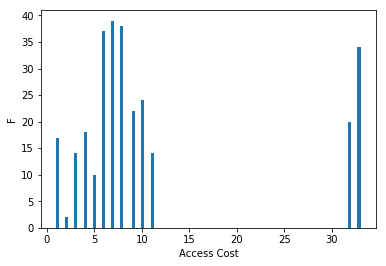

In [13]:
costs = cost.flatten()
import matplotlib.pyplot as plt
plt.hist(costs,100)
plt.xlabel('Access Cost')
plt.ylabel('F')
plt.show()